# Teorema central del límite

Curso 4 (Procesos II)

Parte 5 / Lección 2

Ejercicio 1. Usando phyton comprabamos mediante simulación el teorema central del límite en el caso de variables aleatorias $Ber(p)$ con $p=0.7$. Como en el enunciado del teorema, el parámetro $n$ corresponde al número de sumando $X_1+\dots+X_n$. El parámetro $k=1000$ se usa para generar $k$ valores al azar de la variable aleatoria suma $X_1+\dots+X_n$ y así aproximar su función de distribución.

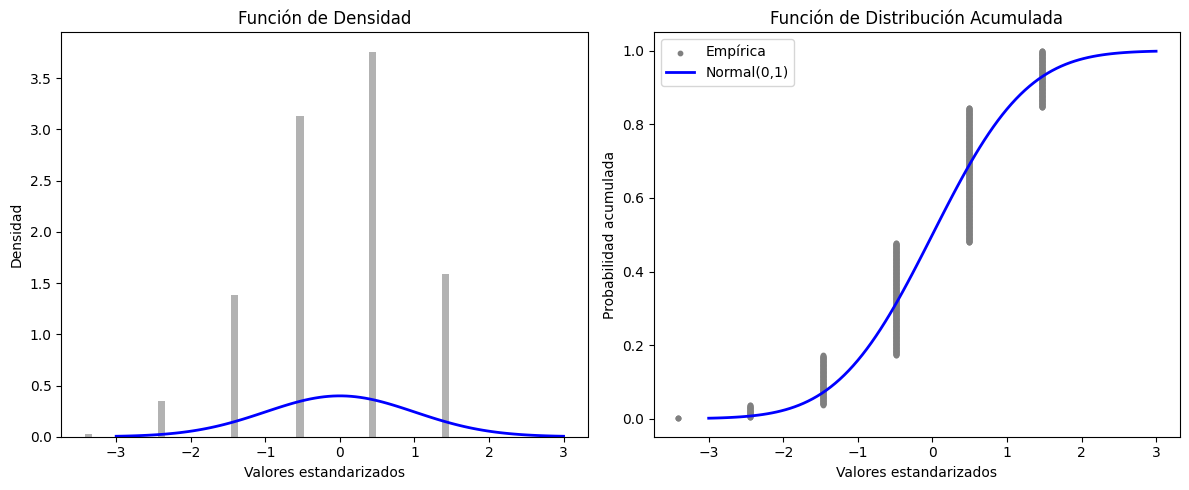

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Número de simulaciones y de sumandos por simulación
k = 1000  # Número de valores simulados
n = 5  # Número de sumandos

# Parámetro de la distribución Bernoulli
p = 0.7

# Generación de datos
s = np.array([np.sum(np.random.binomial(1, p, n)) for _ in range(k)])

# Cálculo de la media, varianza y estandarización
media = n * p
varianza = n * p * (1 - p)
s_estandarizado = (s - media) / np.sqrt(varianza)

# Graficación de la función de densidad
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de la muestra y comparación con la normal estándar
x = np.linspace(-3, 3, 100)
ax[0].hist(s_estandarizado, bins=50, density=True, alpha=0.6, color='gray')
ax[0].plot(x, stats.norm.pdf(x, 0, 1), 'b-', lw=2)
ax[0].set_title("Función de Densidad")
ax[0].set_xlabel("Valores estandarizados")
ax[0].set_ylabel("Densidad")

# Función de distribución empírica vs normal estándar
ecdf = np.sort(s_estandarizado)
y_ecdf = np.arange(1, k + 1) / k
ax[1].scatter(ecdf, y_ecdf, c='gray', s=10, label="Empírica")
ax[1].plot(x, stats.norm.cdf(x, 0, 1), 'b-', lw=2, label="Normal(0,1)")
ax[1].set_title("Función de Distribución Acumulada")
ax[1].set_xlabel("Valores estandarizados")
ax[1].set_ylabel("Probabilidad acumulada")
ax[1].legend()

plt.tight_layout()
plt.show()


Ejercicio 2. Se lanza un dado repetidas veces y sean \(X_1, X_2, \dots\) los resultados de estos lanzamientos. Es razonable suponer que estas variables aleatorias son independientes y con idéntica distribución uniforme en el conjunto \(\{1,2,3,4,5,6\}\). En particular, la esperanza es \(\mu = 3.5\) y la varianza es \(\sigma^2 = 2.916\). Por la ley de los grandes números, sabemos que el promedio parcial

$\bar{X} = \frac{X_1 + \dots + X_n}{n}$


se aproxima a la media \(3.5\) conforme \(n\) crece.

¿Cuántas veces debe lanzarse el dado de tal forma que \(\bar{X}\) se encuentre entre \(3\) y \(4\) con una probabilidad de \(0.99\)?

In [3]:
import scipy.stats as stats
import numpy as np

# Datos del problema
mu = 3.5
sigma2 = 2.916  # Varianza
sigma = np.sqrt(sigma2)  # Desviación estándar
probabilidad = 0.99  # Probabilidad objetivo

# Valores de la desigualdad
limite_inferior = 3
limite_superior = 4

# Transformación a la normal estándar
z_inferior = -0.5  # (3 - 3.5)
z_superior = 0.5   # (4 - 3.5)

# CDF de la normal estándar
def encontrar_n():
    for n in range(1, 10000):  # Probamos valores de n
        desviacion_muestral = np.sqrt(sigma2 / n)
        phi_superior = stats.norm.cdf(z_superior / desviacion_muestral)
        phi_inferior = stats.norm.cdf(z_inferior / desviacion_muestral)
        if phi_superior - phi_inferior >= probabilidad:
            return n  # Devolvemos el primer n que satisface la condición

# Encontramos el valor de n
n_requerido = encontrar_n()
print(f"El número mínimo de lanzamientos requerido es: {n_requerido}")

El número mínimo de lanzamientos requerido es: 78
